'..' already existed in sys.path, skipping
module reloaded: gym_extensions.policies
module reloaded: gym_extensions.utils
module reloaded: gym_extensions.value_functions.tabular
success rate: 0.0415
success rate: 0.042
success rate: 0.1559
success rate: 0.1831
success rate: 0.18988
success rate: 0.17258333333333334
success rate: 0.18832857142857143
success rate: 0.1755
success rate: 0.16353333333333334
success rate: 0.16849


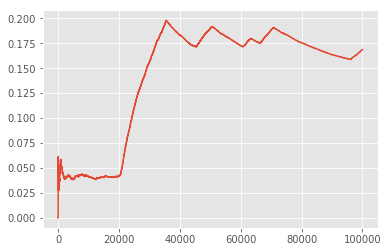

In [205]:
%addpath ..
%reload gym_extensions.policies gym_extensions.utils gym_extensions.value_functions.tabular
from gym_extensions.value_functions.tabular import TabularQ
from gym_extensions.policies import PolicyQ
from gym_extensions.algorithms.td0 import Sarsa 


env = gym.make('FrozenLake-v0')

q = TabularQ(env, optimistic_initialization=1.0)
pi = PolicyQ(q, epsilon=0.001)
algo = Sarsa(q, alpha=0.8, gamma=0.999)

t_max = 2500
num_episodes = 100000

k = 0.0
n = 0.0
success_rate = []

for episode in range(1, num_episodes + 1):
    s = env.reset()
    a = env.action_space.sample()
           
    for t in range(1, 1 + t_max):
        s_next, r, done, info = env.step(a)
        a_next = pi.epsilon_greedy(s_next)
        algo.update(s, a, r, s_next, a_next)

        if done:
            k += r
            n += 1.0
            break
        
        # prepare for next round
        s, a = s_next, a_next
        
    success_rate.append(k/n)
    if episode % (num_episodes // 10) == 0:
        print("success rate:", k / n)

plt.plot(success_rate)